In [1]:
import pandas as pd
import os
from textblob import TextBlob

ticker_file = '../ticker.txt'
data_dir = '../data/raw'

In [2]:
all_prices_df_list = []

try:
    with open(ticker_file, 'r') as infile:
        tickers = [line.strip() for line in infile if line.strip()]
    print(f"Found {len(tickers)} tickers")
except FileNotFoundError:
    print("Can't find file")
    tickers = []
print(tickers)

Found 10 tickers
['AAPL', 'AMZN', 'DIS', 'GOOG', 'KO', 'MCD', 'META', 'MSFT', 'NVDA', 'TSLA']


In [3]:

all_prices_df_list.clear()
for ticker in tickers:
    price_path = os.path.join(data_dir, f"{ticker}_price_history.csv")
    if os.path.exists(price_path):
        price_df = pd.read_csv(price_path, index_col = 'Date', parse_dates=True)
        price_df['Ticker'] = ticker
        all_prices_df_list.append(price_df)
    else:
        print("Price not found")
print(f"\nFinished loading prices for {len(all_prices_df_list)} tickers")
print(all_prices_df_list)
        


Finished loading prices for 10 tickers
[               Open    High      Low   Close       Volume Ticker
Date                                                            
1999-11-01   80.000   80.69   77.370   77.62    2487300.0   AAPL
1999-11-02   78.000   81.69   77.310   80.25    3564600.0   AAPL
1999-11-03   81.620   83.25   81.000   81.50    2932700.0   AAPL
1999-11-04   82.060   85.37   80.620   83.62    3384700.0   AAPL
1999-11-05   84.620   88.37   84.000   88.31    3721500.0   AAPL
...             ...     ...      ...     ...          ...    ...
2025-08-04  204.505  207.88  201.675  203.35   75109298.0   AAPL
2025-08-05  203.400  205.34  202.160  202.92   44155079.0   AAPL
2025-08-06  205.630  215.38  205.590  213.25  108483103.0   AAPL
2025-08-07  218.875  220.85  216.580  220.03   90224834.0   AAPL
2025-08-08  220.830  231.00  219.250  229.35  113853967.0   AAPL

[6482 rows x 6 columns],                Open      High       Low   Close      Volume Ticker
Date                 

In [4]:
#combine price datas
if all_prices_df_list:
    combined_price_df = pd.concat(all_prices_df_list)
    combined_price_df.sort_index(inplace=True)

    print(combined_price_df.shape)
    print(combined_price_df.head)

(7382, 6)
<bound method NDFrame.head of                Open     High     Low   Close      Volume Ticker
Date                                                           
1999-11-01   80.000   80.690   77.37   77.62   2487300.0   AAPL
1999-11-02   78.000   81.690   77.31   80.25   3564600.0   AAPL
1999-11-03   81.620   83.250   81.00   81.50   2932700.0   AAPL
1999-11-04   82.060   85.370   80.62   83.62   3384700.0   AAPL
1999-11-05   84.620   88.370   84.00   88.31   3721500.0   AAPL
...             ...      ...     ...     ...         ...    ...
2025-09-04  317.820  319.425  316.48  316.99   2881528.0    MCD
2025-09-04  117.080  119.675  116.76  118.81   6949291.0    DIS
2025-09-04  231.185  235.770  230.78  235.68  59391779.0   AMZN
2025-09-04  230.155  232.770  226.76  232.66  32196009.0   GOOG
2025-09-04  336.150  338.890  331.48  338.53  60711033.0   TSLA

[7382 rows x 6 columns]>


In [5]:
# get news
all_news_df_list = []

for ticker in tickers:
    news_path = os.path.join(data_dir, f"{ticker}_news.csv")
    if os.path.exists(news_path):
        news_df = pd.read_csv(news_path)
        news_df['Ticker'] = ticker
        all_news_df_list.append(news_df)
    else:
        print("Brh no news avail")

print(f"\nFinished loading news for {len(all_news_df_list)} tickers")
print(all_news_df_list)



Finished loading news for 10 tickers
[             Date                                           Headline Ticker
0      2025-08-10  Warren Buffett's Bright Warning to Wall Street...   AAPL
1      2025-08-10                          Is Apple Stock a Buy Now?   AAPL
2      2025-08-09  Microsoft, Apple, Amazon, and Meta Just Gave N...   AAPL
3      2025-08-09  AAPL NEWS: Did Apple Inc. Mislead Investors? C...   AAPL
4      2025-08-09                   Is Arm Holdings Stock a Buy Now?   AAPL
...           ...                                                ...    ...
20062  2018-11-25       Stock Market Power Rankings: Save Us, Amazon   AAPL
20063  2018-11-18  Stock Market Power Rankings: Apple's $190 Bill...   AAPL
20064  2018-11-12  Stock Market Power Rankings: Last Call for Fac...   AAPL
20065  2018-11-05                        Stock Market Power Rankings   AAPL
20066  2017-04-10         Invest Like Warren Buffett, Not Carl Icahn   AAPL

[20067 rows x 3 columns],              Date     

In [6]:
# combine news

if all_news_df_list:
    combined_news_df = pd.concat(all_news_df_list, ignore_index = True)
    print(combined_news_df.shape)
    print(combined_news_df.head)
else:
    print('No News')

(128384, 3)
<bound method NDFrame.head of               Date                                           Headline Ticker
0       2025-08-10  Warren Buffett's Bright Warning to Wall Street...   AAPL
1       2025-08-10                          Is Apple Stock a Buy Now?   AAPL
2       2025-08-09  Microsoft, Apple, Amazon, and Meta Just Gave N...   AAPL
3       2025-08-09  AAPL NEWS: Did Apple Inc. Mislead Investors? C...   AAPL
4       2025-08-09                   Is Arm Holdings Stock a Buy Now?   AAPL
...            ...                                                ...    ...
128379  2020-05-13  Stocks Slide About 2%, Ending NASDAQ's Six-Day...   TSLA
128380  2020-05-02            Market Slides More Than 2% to Begin May   TSLA
128381  2020-04-02             Second Quarter Begins with a 4% Plunge   TSLA
128382  2019-03-09  Is This the Final Nail in the Coffin for Tesla...   TSLA
128383  2018-11-18  Stock Market Power Rankings: Apple's $190 Bill...   TSLA

[128384 rows x 3 columns]>


In [7]:
def get_sentiment(text):
    if not isinstance(text,str):
        return 0
    return TextBlob(text).sentiment.polarity
from tqdm.auto import tqdm

tqdm.pandas()
combined_news_df["Sentiment"] = combined_news_df['Headline'].progress_apply(get_sentiment)
print(combined_news_df.head())

/home/seankimjr/miniconda3/envs/neurotrader/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 128384/128384 [00:22<00:00, 5677.44it/s]

         Date                                           Headline Ticker  \
0  2025-08-10  Warren Buffett's Bright Warning to Wall Street...   AAPL   
1  2025-08-10                          Is Apple Stock a Buy Now?   AAPL   
2  2025-08-09  Microsoft, Apple, Amazon, and Meta Just Gave N...   AAPL   
3  2025-08-09  AAPL NEWS: Did Apple Inc. Mislead Investors? C...   AAPL   
4  2025-08-09                   Is Arm Holdings Stock a Buy Now?   AAPL   

   Sentiment  
0        0.7  
1        0.0  
2        0.8  
3        0.1  
4        0.0  


In [11]:
combined_news_df['Sentiment']= pd.to_numeric(combined_news_df['Sentiment'], errors='coerce')
combined_news_df['Sentiment'].fillna(0)

print(combined_news_df.head())

        Date                                           Headline Ticker  \
0 2025-08-10  Warren Buffett's Bright Warning to Wall Street...   AAPL   
1 2025-08-10                          Is Apple Stock a Buy Now?   AAPL   
2 2025-08-09  Microsoft, Apple, Amazon, and Meta Just Gave N...   AAPL   
3 2025-08-09  AAPL NEWS: Did Apple Inc. Mislead Investors? C...   AAPL   
4 2025-08-09                   Is Arm Holdings Stock a Buy Now?   AAPL   

   Sentiment  
0        0.7  
1        0.0  
2        0.8  
3        0.1  
4        0.0  


In [12]:
combined_news_df['Date']= pd.to_datetime(combined_news_df['Date'])
daily_sentiment = combined_news_df.groupby([combined_news_df['Date'].dt.date, 'Ticker'])['Sentiment'].mean()
print(daily_sentiment.head())

Date        Ticker
2016-06-28  GOOG      0.0
            MSFT     -0.7
2016-06-29  MCD       0.0
2017-04-10  AAPL      0.0
2017-12-31  GOOG     -0.6
Name: Sentiment, dtype: float64


In [13]:
daily_sentiment_df = daily_sentiment.reset_index()
daily_sentiment_df.columns = ['Date', 'Ticker', 'Sentiment']

daily_sentiment_df['Date'] = pd.to_datetime(daily_sentiment_df['Date']).dt.normalize()
daily_sentiment_df['Ticker'] = daily_sentiment_df['Ticker'].str.upper().str.strip()

price_df_for_merge = combined_price_df.reset_index()
price_df_for_merge['Date'] = pd.to_datetime(price_df_for_merge['Date']).dt.normalize()
price_df_for_merge['Ticker'] = price_df_for_merge['Ticker'].str.upper().str.strip()

final_df = pd.merge(
    price_df_for_merge,
    daily_sentiment_df,
    on=['Date', 'Ticker'],
    how='left'
)

final_df['Sentiment'] = final_df['Sentiment'].fillna(0)

print(final_df.head())

        Date   Open   High    Low  Close     Volume Ticker  Sentiment
0 1999-11-01  80.00  80.69  77.37  77.62  2487300.0   AAPL        0.0
1 1999-11-02  78.00  81.69  77.31  80.25  3564600.0   AAPL        0.0
2 1999-11-03  81.62  83.25  81.00  81.50  2932700.0   AAPL        0.0
3 1999-11-04  82.06  85.37  80.62  83.62  3384700.0   AAPL        0.0
4 1999-11-05  84.62  88.37  84.00  88.31  3721500.0   AAPL        0.0


In [14]:
final_df.set_index('Date', inplace=True)

print(final_df.head())

             Open   High    Low  Close     Volume Ticker  Sentiment
Date                                                               
1999-11-01  80.00  80.69  77.37  77.62  2487300.0   AAPL        0.0
1999-11-02  78.00  81.69  77.31  80.25  3564600.0   AAPL        0.0
1999-11-03  81.62  83.25  81.00  81.50  2932700.0   AAPL        0.0
1999-11-04  82.06  85.37  80.62  83.62  3384700.0   AAPL        0.0
1999-11-05  84.62  88.37  84.00  88.31  3721500.0   AAPL        0.0


In [15]:
final_df['Daily_Return'] = final_df.groupby('Ticker')['Close'].transform(lambda x: x.pct_change())

print(final_df[final_df["Ticker"]== "AAPL"].tail())

               Open    High      Low   Close       Volume Ticker  Sentiment  \
Date                                                                          
2025-08-04  204.505  207.88  201.675  203.35   75109298.0   AAPL   0.000000   
2025-08-05  203.400  205.34  202.160  202.92   44155079.0   AAPL   0.010000   
2025-08-06  205.630  215.38  205.590  213.25  108483103.0   AAPL   0.146614   
2025-08-07  218.875  220.85  216.580  220.03   90224834.0   AAPL  -0.147186   
2025-08-08  220.830  231.00  219.250  229.35  113853967.0   AAPL   0.146591   

            Daily_Return  
Date                      
2025-08-04      0.004793  
2025-08-05     -0.002115  
2025-08-06      0.050907  
2025-08-07      0.031794  
2025-08-08      0.042358  


In [16]:
print(final_df.info())  # shows columns, types, and non-null counts
print(final_df.index)   # shows the index and if there are duplicates
print(final_df.index.duplicated().sum())   # how many duplicate index rows
print(final_df.columns.duplicated())       # check for duplicate column names


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7382 entries, 1999-11-01 to 2025-09-04
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          7382 non-null   float64
 1   High          7382 non-null   float64
 2   Low           7382 non-null   float64
 3   Close         7382 non-null   float64
 4   Volume        7382 non-null   float64
 5   Ticker        7382 non-null   object 
 6   Sentiment     7382 non-null   float64
 7   Daily_Return  7372 non-null   float64
dtypes: float64(7), object(1)
memory usage: 519.0+ KB
None
DatetimeIndex(['1999-11-01', '1999-11-02', '1999-11-03', '1999-11-04',
               '1999-11-05', '1999-11-08', '1999-11-09', '1999-11-10',
               '1999-11-11', '1999-11-12',
               ...
               '2025-09-03', '2025-09-04', '2025-09-04', '2025-09-04',
               '2025-09-04', '2025-09-04', '2025-09-04', '2025-09-04',
               '2025-09-04', '2025-09-04'

In [17]:
import pandas as pd
import pandas_ta as ta

# Reset index if Date is already index
final_df = final_df.reset_index()

# Prepare a list to hold processed dataframes
dfs = []

# Process each ticker separately
for ticker, df in final_df.groupby('Ticker'):
    df = df.copy()  # avoid SettingWithCopyWarning
    
    # MA20 and RSI
    df['MA20'] = df['Close'].rolling(20).mean()
    df['RSI'] = ta.rsi(df['Close'], length=14)
    
    # Volatility
    df['Volatility'] = (df['High'] - df['Low']) / df['Low'] * 100
    
    # MACD
    macd = ta.macd(df['Close'], fast=12, slow=26, signal=9)
    # Remove old MACD columns if they exist
    for col in macd.columns:
        if col in df.columns:
            df = df.drop(columns=col)
    df = df.join(macd)
    
    # ATR
    atr = ta.atr(df['High'], df['Low'], df['Close'], length=14)
    df['ATR'] = atr
    
    # OBV
    obv = ta.obv(df['Close'], df['Volume'])
    df['OBV'] = obv
    
    dfs.append(df)

# Concatenate all tickers back into one DataFrame
final_df = pd.concat(dfs, ignore_index=True)

# Optional: set multi-index for Date + Ticker
final_df.set_index(['Date', 'Ticker'], inplace=True)

# Example: show last 5 rows for NVDA
print(final_df.loc[pd.IndexSlice[:, 'NVDA'], :].tail())


/home/seankimjr/miniconda3/envs/neurotrader/lib/python3.11/site-packages/pandas_ta/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


                     Open     High      Low   Close       Volume  Sentiment  \
Date       Ticker                                                             
2025-08-28 NVDA    180.82  184.470  176.410  180.17  281787824.0        0.0   
2025-08-29 NVDA    178.11  178.150  173.145  174.18  243257873.0        0.0   
2025-09-02 NVDA    170.00  172.379  167.220  170.78  231164853.0        0.0   
2025-09-03 NVDA    171.06  172.410  168.875  170.62  161466040.0        0.0   
2025-09-04 NVDA    170.57  171.860  169.410  171.66  141670144.0        0.0   

                   Daily_Return     MA20        RSI  Volatility  MACD_12_26_9  \
Date       Ticker                                                               
2025-08-28 NVDA       -0.007874  179.676  57.596945    4.568902      2.753159   
2025-08-29 NVDA       -0.033246  179.699  46.220519    2.890641      2.125646   
2025-09-02 NVDA       -0.019520  179.238  41.241153    3.085157      1.338556   
2025-09-03 NVDA       -0.000937  178.856 

In [18]:
final_df['Target'] = final_df.groupby('Ticker')['Close'].transform(
    lambda x: (x.shift(-1) > x).astype(int)
)
print(final_df.loc[pd.IndexSlice[:, 'MSFT'], :].tail())

                      Open    High       Low   Close      Volume  Sentiment  \
Date       Ticker                                                             
2025-08-28 MSFT    507.090  511.09  505.5000  509.64  18015593.0        0.0   
2025-08-29 MSFT    508.660  509.60  504.4915  506.69  20961569.0        0.0   
2025-09-02 MSFT    500.465  506.00  496.8100  505.12  18127995.0        0.0   
2025-09-03 MSFT    503.790  507.79  502.3200  505.35  15995154.0        0.0   
2025-09-04 MSFT    504.300  508.15  503.1500  507.97  15509486.0        0.0   

                   Daily_Return      MA20        RSI  Volatility  \
Date       Ticker                                                  
2025-08-28 MSFT        0.005723  516.8150  48.765922    1.105836   
2025-08-29 MSFT       -0.005788  515.9440  46.084063    1.012604   
2025-09-02 MSFT       -0.003099  514.4180  44.675894    1.849802   
2025-09-03 MSFT        0.000455  513.2980  44.941319    1.088947   
2025-09-04 MSFT        0.005185  512.4

In [19]:
print("Shape of DataFrame before dropping NaNs:", final_df.shape)
final_df.dropna(inplace=True)

final_df['Target'] = final_df['Target'].astype(int)

print("Shape of DataFrame after dropping NaNs: ", final_df.shape)

Shape of DataFrame before dropping NaNs: (7382, 16)
Shape of DataFrame after dropping NaNs:  (7052, 16)


In [22]:
feature_columns = [
    'Sentiment', 'Daily_Return', 'MA20', 'RSI', 'Volatility',
    'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9',
    'ATR', 'OBV'
]
X = final_df[feature_columns]
y = final_df['Target']
split_point = int(len(X) * 0.8)

X_train = X[:split_point]
X_test = X[split_point:]

y_train = y[:split_point]
y_test = y[split_point:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5641, 10)
y_train shape: (5641,)
X_test shape: (1411, 10)
y_test shape: (1411,)


In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

best_params = {
    'colsample_bytree': 0.7,
    'learning_rate': 0.01,
    'max_depth': 3,
    'n_estimators': 100,
    'subsample': 0.7,
    'random_state': 42,
    'use_label_encoder': False,
    'eval_metric': 'logloss'
}

model = XGBClassifier(**best_params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred, target_names=['Down', 'Up']))


Model Accuracy: 50.82%
              precision    recall  f1-score   support

        Down       0.46      0.23      0.31       667
          Up       0.52      0.76      0.62       744

    accuracy                           0.51      1411
   macro avg       0.49      0.49      0.46      1411
weighted avg       0.49      0.51      0.47      1411



/home/seankimjr/miniconda3/envs/neurotrader/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [07:15:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1754002079811/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [34]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


lstm_df_source = final_df.copy()
lstm_feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment']

lookback_window = 60
all_X_lstm = []
all_y_lstm = []

for ticker, group in lstm_df_source.groupby('Ticker'):
    print(f" Processing sequences for {ticker}")

    scler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(group[lstm_feature_columns])

    y_target = group['Target'].values

    for i in range(lookback_window, len(scaled_data)):
        all_X_lstm.append(scaled_data[i-lookback_window:i])
        all_y_lstm.append(y_target[i])

X_lstm = np.array(all_X_lstm)
y_lstm = np.array(all_y_lstm)

print(X_lstm.shape)
print(y_lstm.shape)

 Processing sequences for AAPL
 Processing sequences for AMZN
 Processing sequences for DIS
 Processing sequences for GOOG
 Processing sequences for KO
 Processing sequences for MCD
 Processing sequences for META
 Processing sequences for MSFT
 Processing sequences for NVDA
 Processing sequences for TSLA
(6452, 60, 6)
(6452,)


In [35]:
split_point_lstm = int(len(X_lstm)*0.8)

X_train_lstm = X_lstm[:split_point_lstm]
X_test_lstm = X_lstm[split_point_lstm:]

y_train_lstm = y_lstm[:split_point_lstm]
y_test_lstm = y_lstm[split_point_lstm:]

print("X_train_lstm shape:", X_train_lstm.shape)
print("y_train_lstm shape:", y_train_lstm.shape)

print("X_test_lstm shape:", X_test_lstm.shape)
print("y_test_lstm shape:", y_test_lstm.shape)

X_train_lstm shape: (5161, 60, 6)
y_train_lstm shape: (5161,)
X_test_lstm shape: (1291, 60, 6)
y_test_lstm shape: (1291,)


In [36]:
import torch

X_train_lstm_tensor = torch.from_numpy(X_train_lstm).float()
y_train_lstm_tensor = torch.from_numpy(y_train_lstm).float()

X_test_lstm_tensor = torch.from_numpy(X_test_lstm).float()
y_test_lstm_tensor = torch.from_numpy(y_test_lstm).float()

print(X_train_lstm_tensor.shape)

torch.Size([5161, 60, 6])


In [37]:
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size=6, hidden_layer_size=50, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        # Define the LSTM layer. batch_first=True is important for our data shape.
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)

        # Define the output layer that takes the LSTM's output and makes a prediction
        self.linear = nn.Linear(hidden_layer_size, output_size)

        # Define the activation function to squash the output to a probability (0 to 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_seq):
        # The LSTM returns the full sequence output and the final hidden state
        lstm_out, _ = self.lstm(input_seq)
        
        # We only care about the output of the very last timestep in the sequence
        last_time_step_out = lstm_out[:, -1, :]
        
        # Pass the last output through the linear layer
        predictions = self.linear(last_time_step_out)
        
        # Apply the sigmoid function to get our final 0-1 prediction
        final_prediction = self.sigmoid(predictions)
        return final_prediction


In [38]:
model = LSTMModel()
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 20
model.train() 
for i in range(epochs):
    # Get the model's prediction for the entire training set
    y_pred = model(X_train_lstm_tensor)
    
    # Calculate the loss by comparing the predictions to the true labels
    # We need to reshape the labels to match the prediction's shape
    loss = loss_function(y_pred, y_train_lstm_tensor.view(-1, 1))
    
    # The standard PyTorch training steps:
    optimizer.zero_grad() # 1. Reset the gradients
    loss.backward()       # 2. Backpropagate the loss (calculate gradients)
    optimizer.step()      # 3. Update the model's weights
    
    # Print the loss every 5 epochs so we can see it improving
    if (i+1) % 5 == 0:
      print(f'Epoch: {i+1:3} loss: {loss.item():10.8f}')

/home/seankimjr/miniconda3/envs/neurotrader/lib/python3.11/site-packages/torch/autograd/graph.py:825: UserWarning: XPU device count is zero! (Triggered internally at /build/pytorch/c10/xpu/XPUFunctions.cpp:50.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch:   5 loss: 0.69235426
Epoch:  10 loss: 0.69243550
Epoch:  15 loss: 0.69232500
Epoch:  20 loss: 0.69231045


In [39]:
import torch.nn as nn

#Different LSTM Archetechture
class LSTMModelV2(nn.Module):
    def __init__(self, input_size=6, hidden_layer_size=50, num_layers=2, output_size=1, dropout_prob=0.2):
        super().__init__()
        # Define a multi-layer LSTM. batch_first=True is important.
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers, batch_first=True, dropout=dropout_prob)

        # Define the output layer
        self.linear = nn.Linear(hidden_layer_size, output_size)

        # Define the activation function
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq)
        last_time_step_out = lstm_out[:, -1, :]
        predictions = self.linear(last_time_step_out)
        final_prediction = self.sigmoid(predictions)
        return final_prediction



In [40]:
model_v2 = LSTMModelV2()

loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model_v2.parameters(), lr=0.001)

epochs = 20

model_v2.train()

for i in range(epochs):
    y_pred = model_v2(X_train_lstm_tensor)
    
    loss = loss_function(y_pred, y_train_lstm_tensor.view(-1, 1))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i+1) % 5 == 0:
      print(f'Epoch: {i+1:3} loss: {loss.item():10.8f}')


Epoch:   5 loss: 0.69486099
Epoch:  10 loss: 0.69231987
Epoch:  15 loss: 0.69286340
Epoch:  20 loss: 0.69238776

Training complete!


In [41]:
from sklearn.metrics import accuracy_score, classification_report

model_v2.eval()

with torch.no_grad():
    test_predictions_raw = model_v2(X_test_lstm_tensor)
    
    test_predictions = (test_predictions_raw.cpu().numpy() > 0.5).astype(int)
accuracy_lstm = accuracy_score(y_test_lstm, test_predictions)
print(f"\nLSTM Model Accuracy: {accuracy_lstm * 100:.2f}%")

print("\nLSTM Classification Report:")
print(classification_report(y_test_lstm, test_predictions, target_names=['Down', 'Up']))


LSTM Model Accuracy: 52.59%

LSTM Classification Report:
              precision    recall  f1-score   support

        Down       0.00      0.00      0.00       612
          Up       0.53      1.00      0.69       679

    accuracy                           0.53      1291
   macro avg       0.26      0.50      0.34      1291
weighted avg       0.28      0.53      0.36      1291



/home/seankimjr/miniconda3/envs/neurotrader/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/seankimjr/miniconda3/envs/neurotrader/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/seankimjr/miniconda3/envs/neurotrader/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [42]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

regression_df_source = final_df.copy()

input_feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment']

output_feature_column = ['Close'] 

lookback_window = 60
lookahead_window = 5 

all_X_reg = []
all_y_reg = []

for ticker, group in regression_df_source.groupby('Ticker'):
    print(f"  Processing sequences for {ticker}")
    
    scaler_x = MinMaxScaler(feature_range=(0, 1))
    scaled_x_data = scaler_x.fit_transform(group[input_feature_columns])
    
    scaler_y = MinMaxScaler(feature_range=(0, 1))
    scaled_y_data = scaler_y.fit_transform(group[output_feature_column])
    
    for i in range(lookback_window, len(scaled_x_data) - lookahead_window):
        all_X_reg.append(scaled_x_data[i-lookback_window:i])
        all_y_reg.append(scaled_y_data[i:i+lookahead_window].flatten())

X_reg = np.array(all_X_reg)
y_reg = np.array(all_y_reg)

print(X_reg.shape)
print(y_reg.shape)

  Processing sequences for AAPL
  Processing sequences for AMZN
  Processing sequences for DIS
  Processing sequences for GOOG
  Processing sequences for KO
  Processing sequences for MCD
  Processing sequences for META
  Processing sequences for MSFT
  Processing sequences for NVDA
  Processing sequences for TSLA
(6402, 60, 6)
(6402, 5)


In [44]:
split_point_reg = int(len(X_lstm)*0.8)

X_train_reg = X_reg[:split_point_reg]
X_test_reg = X_reg[split_point_reg:]

y_train_reg = y_reg[:split_point_reg]
y_test_reg = y_reg[split_point_reg:]

print("X_train_reg shape:", X_train_reg.shape)
print("y_train_reg shape:", y_train_reg.shape)

print("X_test_reg shape:", X_test_reg.shape)
print("y_test_reg shape:", y_test_reg.shape)

X_train_reg shape: (5161, 60, 6)
y_train_reg shape: (5161, 5)
X_test_reg shape: (1241, 60, 6)
y_test_reg shape: (1241, 5)


In [45]:
X_train_reg_tensor = torch.from_numpy(X_train_reg).float()
y_train_reg_tensor = torch.from_numpy(y_train_reg).float()

X_test_reg_tensor = torch.from_numpy(X_test_reg).float()
y_test_reg_tensor = torch.from_numpy(y_test_reg).float()

print(X_train_reg_tensor.shape)

torch.Size([5161, 60, 6])


In [47]:
# LSTM Lin Reg Model
import torch.nn as nn

class LSTMRegressor(nn.Module):
    def __init__(self, input_size=6, hidden_layer_size=50, output_size=5):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        # Second layer of LSTM
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers=2, batch_first=True, dropout=0.2)

        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq)
        
        last_time_step_out = lstm_out[:, -1, :]
        
        prediction = self.linear(last_time_step_out)
        
        return prediction

In [53]:
model_reg = LSTMRegressor()

loss_function = nn.MSELoss()

optimizer = torch.optim.Adam(model_reg.parameters(), lr = 0.001)

epochs = 30

model_reg.train()

for i in range(epochs):
    y_pred = model_reg(X_train_reg_tensor)

    loss = loss_function(y_pred, y_train_reg_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1)%5 == 0:
        print(f'Epoch: {i+1:3} loss: {loss.item():10.8f}')


print("Done")

Epoch:   5 loss: 0.09951177
Epoch:  10 loss: 0.07232413
Epoch:  15 loss: 0.04616300
Epoch:  20 loss: 0.04026823
Epoch:  25 loss: 0.02657239
Epoch:  30 loss: 0.01452291
Done


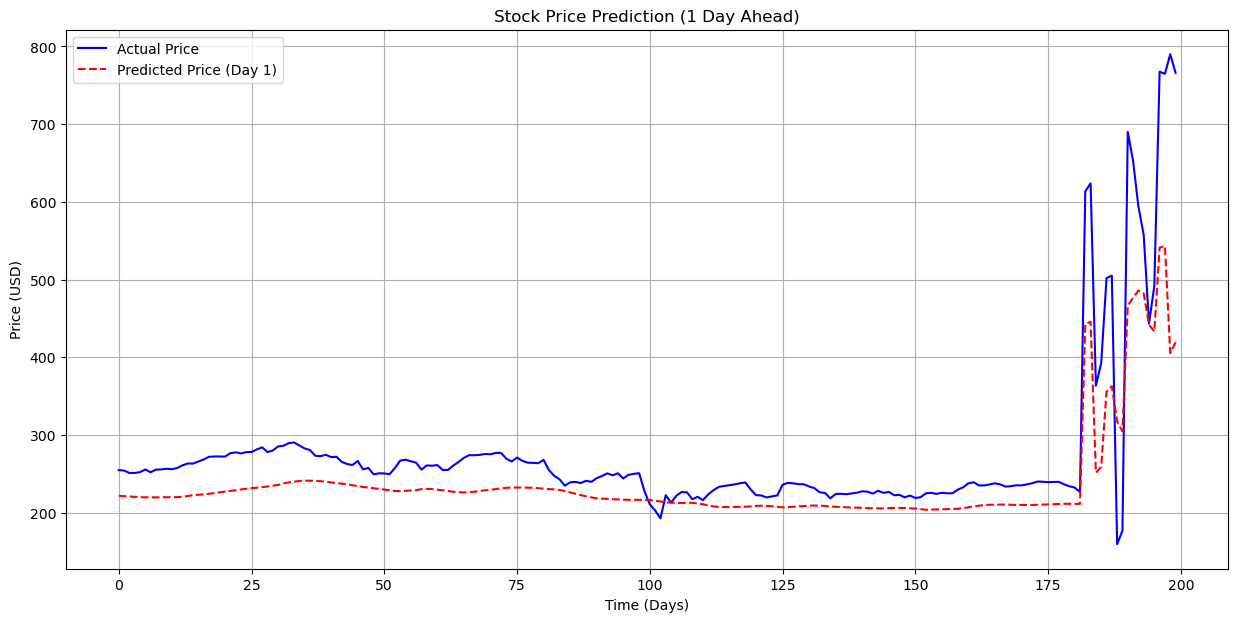

In [56]:
import matplotlib.pyplot as plt

model_reg.eval()

with torch.no_grad():
    test_predictions_scaled = model_reg(X_test_reg_tensor)

output_feature_column = ['Close']
scaler_y = MinMaxScaler(feature_range=(0,1))
scaler_y.fit(final_df[output_feature_column])

predicted_prices = scaler_y.inverse_transform(test_predictions_scaled.cpu().numpy())
actual_prices = scaler_y.inverse_transform(y_test_reg)

plt.figure(figsize=(15, 7))
plt.plot(actual_prices[-200:, 0], label='Actual Price', color='blue')
plt.plot(predicted_prices[-200:, 0], label='Predicted Price (Day 1)', color='red', linestyle='--')
plt.title('Stock Price Prediction (1 Day Ahead)')
plt.xlabel('Time (Days)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
feature_rich_df = final_df.copy()

input_feature_columns = [
    'Close', 'Volume', 'Sentiment', 
    'RSI', 'MACD_12_26_9', 'ATR', 'Volatility'
]

output_feature_column = ['Close'] 

lookback_window = 60
lookahead_window = 5
all_X_lstm_rich = []
all_y_lstm_rich = []

for ticker, group in feature_rich_df.groupby('Ticker'):
    print(f"  Processing feature-rich sequences for {ticker}...")
    
    scaler_x = MinMaxScaler(feature_range=(0, 1))
    scaled_x_data = scaler_x.fit_transform(group[input_feature_columns])
    
    scaler_y = MinMaxScaler(feature_range=(0, 1))
    scaled_y_data = scaler_y.fit_transform(group[output_feature_column])
    
    for i in range(lookback_window, len(scaled_x_data) - lookahead_window):
        all_X_lstm_rich.append(scaled_x_data[i-lookback_window:i])
        all_y_lstm_rich.append(scaled_y_data[i:i+lookahead_window].flatten())

X_lstm_rich = np.array(all_X_lstm_rich)
y_lstm_rich = np.array(all_y_lstm_rich)

  Processing feature-rich sequences for AAPL...
  Processing feature-rich sequences for AMZN...
  Processing feature-rich sequences for DIS...
  Processing feature-rich sequences for GOOG...
  Processing feature-rich sequences for KO...
  Processing feature-rich sequences for MCD...
  Processing feature-rich sequences for META...
  Processing feature-rich sequences for MSFT...
  Processing feature-rich sequences for NVDA...
  Processing feature-rich sequences for TSLA...


In [67]:
split_point_rich = int(len(X_lstm_rich)*0.8)

X_train_rich = X_lstm_rich[:split_point_rich]
X_test_rich = X_lstm_rich[split_point_rich:]

y_train_rich = y_lstm_rich[:split_point_rich]
y_test_rich = y_lstm_rich[split_point_rich:]

print("X_train_rich shape:", X_train_rich.shape)
print("y_train_rich shape:", y_train_rich.shape)

print("X_test_rich shape:", X_test_rich.shape)
print("y_test_rich shape:", y_test_rich.shape)

X_train_rich shape: (5121, 60, 7)
y_train_rich shape: (5121, 5)
X_test_rich shape: (1281, 60, 7)
y_test_rich shape: (1281, 5)


In [69]:
X_train_rich_tensor = torch.from_numpy(X_train_rich).float()
y_train_rich_tensor = torch.from_numpy(y_train_rich).float()

X_test_rich_tensor = torch.from_numpy(X_test_rich).float()
y_test_rich_tensor = torch.from_numpy(y_test_rich).float()

print(X_train_rich_tensor.shape)

print(y_train_rich_tensor.shape)

torch.Size([5121, 60, 7])
torch.Size([5121, 5])


In [72]:
model_rich = LSTMRegressor(input_size=7)
loss_function = nn.MSELoss()
optimizer_rich = torch.optim.Adam(model_rich.parameters(), lr=0.001)
epochs = 30
model_rich.train()

for i in range(epochs):
    y_pred = model_rich(X_train_rich_tensor)

    loss = loss_function(y_pred, y_train_rich_tensor)

    optimizer_rich.zero_grad()
    loss.backward()
    optimizer_rich.step()

    if (i+1)%5 == 0:
        print(f'Epoch: {i+1:3} loss: {loss.item():10.8f}')


print("Done")

Epoch:   5 loss: 0.10097666
Epoch:  10 loss: 0.07594212
Epoch:  15 loss: 0.05245032
Epoch:  20 loss: 0.05288786
Epoch:  25 loss: 0.04492039
Epoch:  30 loss: 0.04321865
Done


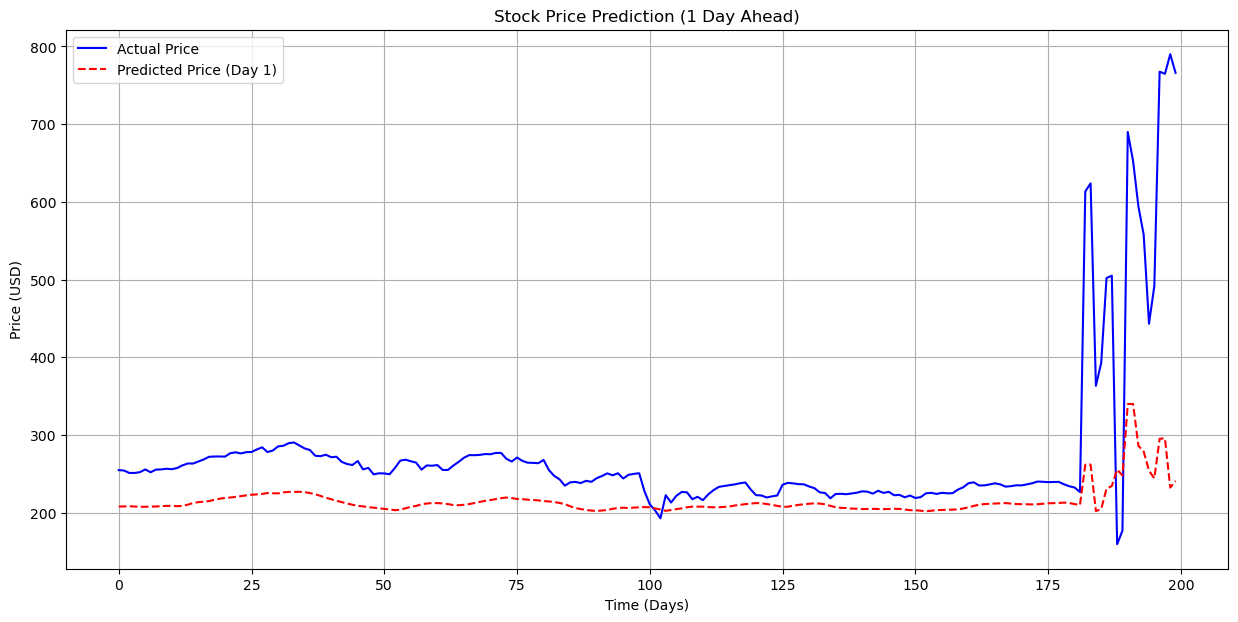

In [73]:
import matplotlib.pyplot as plt

model_rich.eval()

with torch.no_grad():
    test_predictions_scaled = model_rich(X_test_rich_tensor)

output_feature_column = ['Close']
scaler_y = MinMaxScaler(feature_range=(0,1))
scaler_y.fit(final_df[output_feature_column])

predicted_prices = scaler_y.inverse_transform(test_predictions_scaled.cpu().numpy())
actual_prices = scaler_y.inverse_transform(y_test_rich)

plt.figure(figsize=(15, 7))
plt.plot(actual_prices[-200:, 0], label='Actual Price', color='blue')
plt.plot(predicted_prices[-200:, 0], label='Predicted Price (Day 1)', color='red', linestyle='--')
plt.title('Stock Price Prediction (1 Day Ahead)')
plt.xlabel('Time (Days)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
import joblib

model_save_dir = '../models/'
os.makedirs(model_save_dir, exist_ok=True)

xgboost_model_path = os.path.join(model_save_dir, 'xgboost_model.pkl')
joblib.dump(model, xgboost_model_path)

print(f"XGBoost model saved to: {xgboost_model_path}")

XGBoost model saved to: ../models/xgboost_model.pkl


In [75]:
import torch

lstm_model_path = os.path.join(model_save_dir, 'lstm_model.pth')
torch.save(model_rich.state_dict(), lstm_model_path)

print(f"LSTM model saved to: {lstm_model_path}")

LSTM model saved to: ../models/lstm_model.pth
